## initial

In [1]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
notebook_dir = os.path.dirname(os.path.abspath('spotify_itay.ipynb'))

project_root = os.path.abspath(os.path.join(notebook_dir, os.pardir, os.pardir))


src_dir = os.path.join(project_root, 'src')
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)
 
import pandas as pd
import pd_explain

usetex-False


In [2]:
spotify_all = (pd.read_csv(r"..\Datasets\spotify_all.csv"))

True

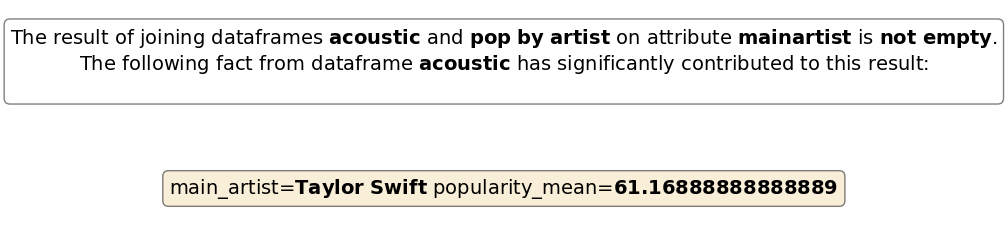

In [3]:
count_artist = spotify_all.groupby('main_artist').main_artist.count()
count_artist = count_artist[count_artist.values > 100]
spotify_frequent = spotify_all[spotify_all['main_artist'].isin(count_artist.index)]

pop_by_artist = spotify_frequent.groupby('main_artist')['popularity'].mean()
# pop_by_artist_df = pd.DataFrame({'main_artist': pop_by_artist.index, 'mean_popularity': pop_by_artist.values})
pop_by_artist = pop_by_artist[pop_by_artist.values > 60] 

acoustic = spotify_frequent[spotify_frequent['acousticness'] > 0.95]
acoustic.b_join(pop_by_artist, on='main_artist', explain=True, consider ='right', top_k=2)